In [4]:
import pandas as pd         #importing libraries for Data preprocessing and EDA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Data inserting and understanding

df = pd.read_csv("/Users/sathya-22886/Downloads/playground-series-s4e12/train.csv")
df.head()
df.info()
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [6]:
df.shape

(1200000, 21)

In [7]:
#date column is under object data type, which has to be rectified
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
df.dtypes

id                               int64
Age                            float64
Gender                          object
Annual Income                  float64
Marital Status                  object
Number of Dependents           float64
Education Level                 object
Occupation                      object
Health Score                   float64
Location                        object
Policy Type                     object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date       datetime64[ns]
Customer Feedback               object
Smoking Status                  object
Exercise Frequency              object
Property Type                   object
Premium Amount                 float64
dtype: object

In [8]:
#understanding the % of missing data in each column and making a decision on keeping or dropping columns for the analysis
missing_percent = df.isnull().mean()*100
missing_percent.sort_values(ascending=False)

Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
id                       0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Policy Type              0.000000
Policy Start Date        0.000000
Location                 0.000000
Education Level          0.000000
Gender                   0.000000
Premium Amount           0.000000
dtype: float64

In [ ]:
'''
(i) % below 10 - fill the data using mean/median/mode
(ii) Previous claim has a missing percent of 30%, which is the highest, but since it's also a primary data point, 
     so we are going to consider it for the analysis
(iii) Chose to drop the Occupation & Customer feedback as they have a considerable % of missing values and a low impact on the premium
'''

In [9]:
df.drop(columns=["Occupation", "Customer Feedback", "id", "Policy Start Date"], inplace = True) 
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Health Score', 'Location',
       'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [10]:
df['Previous Claims'] = df['Previous Claims'].fillna(df['Previous Claims'].median())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
df['Number of Dependents'] = df['Number of Dependents'].fillna(df['Number of Dependents'].median())
df['Health Score'] = df['Health Score'].fillna(df['Health Score'].median())
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Vehicle Age'] = df['Vehicle Age'].fillna(df['Vehicle Age'].median())
df['Insurance Duration'] = df['Insurance Duration'].fillna(df['Insurance Duration'].median())
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

#we used median mostly to ensure less skewness minimise outliers, and for marital status mode, as it's an object

In [11]:
df.isnull().sum() #ensuring there is no null data for processing

Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [ ]:
#EDA analysis between feature columns vs. target column (Premium amount) && Categorical columns Vs target to understand the relationships

<function matplotlib.pyplot.show(close=None, block=None)>

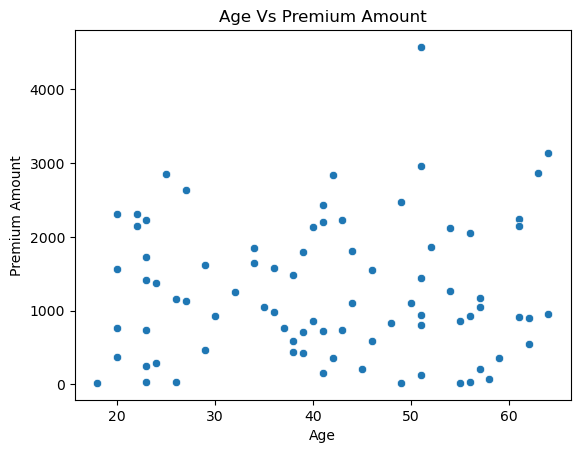

In [10]:
#Feature columns Vs target Column
sns.scatterplot(
        x=df["Age"].sample(10000),
        y=df['Premium Amount'].sample(10000)
    )
plt.title("Age Vs Premium Amount")
plt.show

In [ ]:
#Age vs Premium the plot is scattered more showing that it affects slightly. And the higher premium is provide as Age increases

<function matplotlib.pyplot.show(close=None, block=None)>

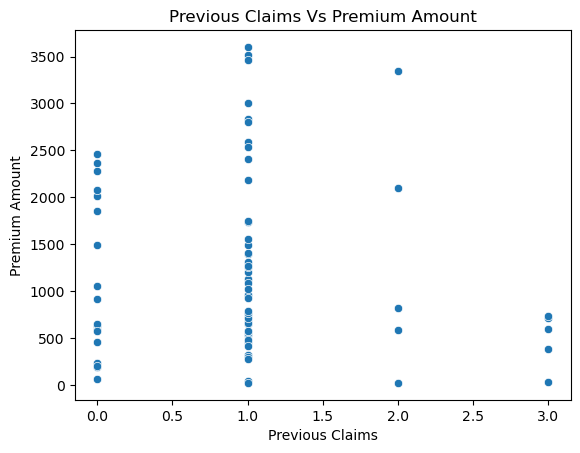

In [11]:
sns.scatterplot(
        x=df["Previous Claims"].sample(10000),
        y=df['Premium Amount'].sample(10000)
    )
plt.title("Previous Claims Vs Premium Amount")
plt.show

In [26]:
# Affects the premium most as the premium amount increased with 1-2 claims, with few data for 3-5 claims, mostly it's premium is higher.

<function matplotlib.pyplot.show(close=None, block=None)>

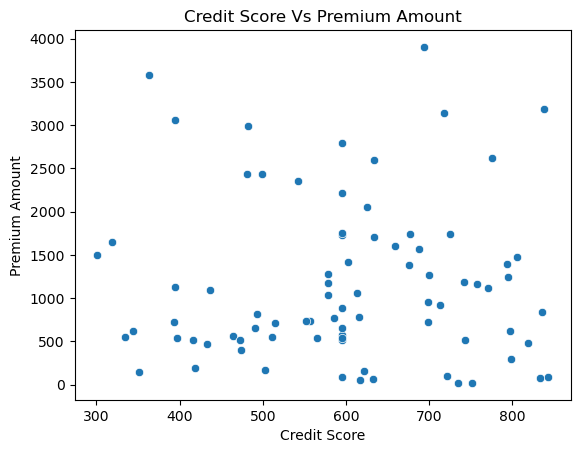

In [12]:
sns.scatterplot(
        x=df["Credit Score"].sample(10000),
        y=df['Premium Amount'].sample(10000)
    )
plt.title("Credit Score Vs Premium Amount")
plt.show

In [29]:
#Credit score increases premium lessens, though there is higher premium is some case it may be due to other factors 

<function matplotlib.pyplot.show(close=None, block=None)>

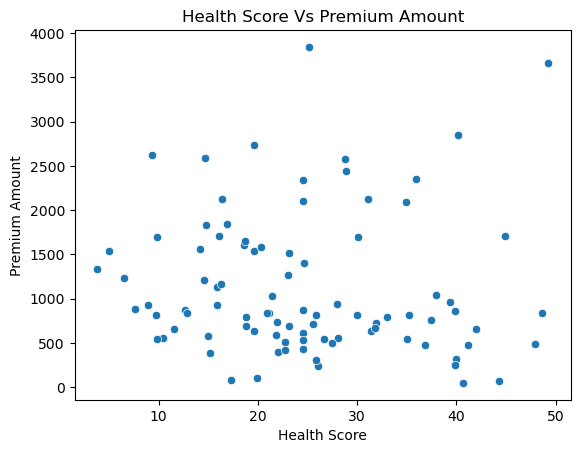

In [13]:
sns.scatterplot(
        x=df["Health Score"].sample(10000),
        y=df['Premium Amount'].sample(10000)
    )
plt.title("Health Score Vs Premium Amount")
plt.show

In [ ]:
#Health score cleary say as the individual's health is higher, the premium is lower. Predominantly, it affects premium

<function matplotlib.pyplot.show(close=None, block=None)>

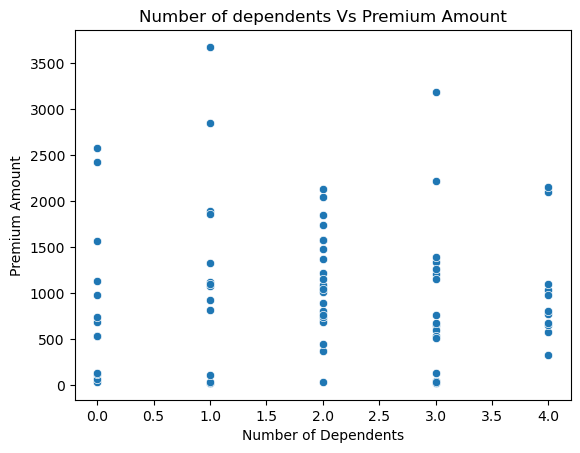

In [14]:
sns.scatterplot(
    x=df['Number of Dependents'].sample(10000),
    y=df['Premium Amount'].sample(10000)
)
plt.title("Number of dependents Vs Premium Amount")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

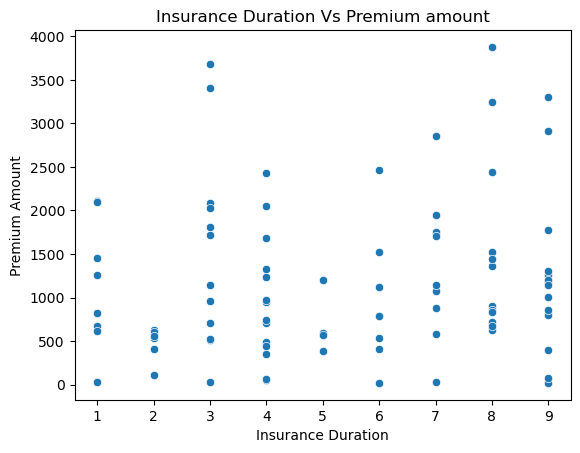

In [15]:
sns.scatterplot(
    x=df['Insurance Duration'].sample(10000),
    y=df['Premium Amount'].sample(10000)
)
plt.title('Insurance Duration Vs Premium amount')
plt.show

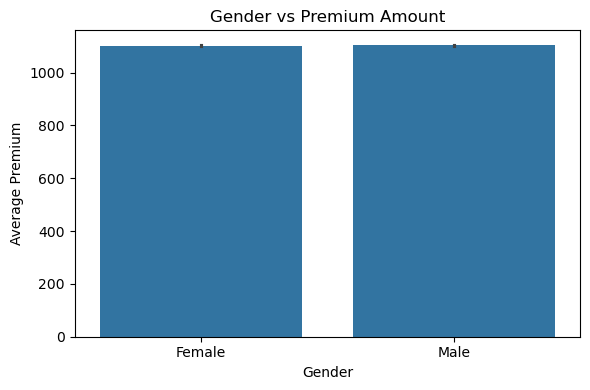

In [16]:
#Categorical vs target columns

plt.figure(figsize=(6,4))  # adjust figure size
sns.barplot(
    x="Gender",
    y="Premium Amount",
    data=df,
    estimator="mean",  # average premium
)

plt.xlabel("Gender")
plt.ylabel("Average Premium")
plt.title("Gender vs Premium Amount")
plt.tight_layout()
plt.show()

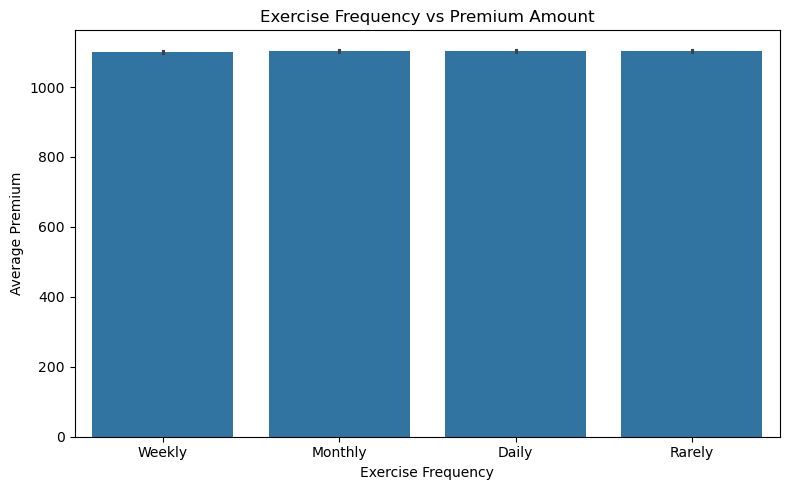

In [17]:
plt.figure(figsize=(8,5))  # adjust figure size
sns.barplot(
    x="Exercise Frequency",
    y="Premium Amount",
    data=df,
    estimator="mean",
)

plt.xlabel("Exercise Frequency")
plt.ylabel("Average Premium")
plt.title("Exercise Frequency vs Premium Amount")
plt.tight_layout()
plt.show()

In [ ]:
#checked for all the categorical columns all display almost flat bar line for premium showing flat line

In [18]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,4.114329e+01,3.241431e+04,2.009026e+00,2.555000e+01,1.001873e+00,9.569891e+00,5.931628e+02,5.018219e+00,1.102545e+03
std,1.343402e+01,3.161560e+04,1.351022e+00,1.182343e+01,8.203294e-01,5.776174e+00,1.411041e+02,2.594330e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.646000e+03,1.000000e+00,1.655457e+01,0.000000e+00,5.000000e+00,4.840000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000e+00,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.393600e+04,3.000000e+00,3.377289e+01,1.000000e+00,1.500000e+01,7.060000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000e+00,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


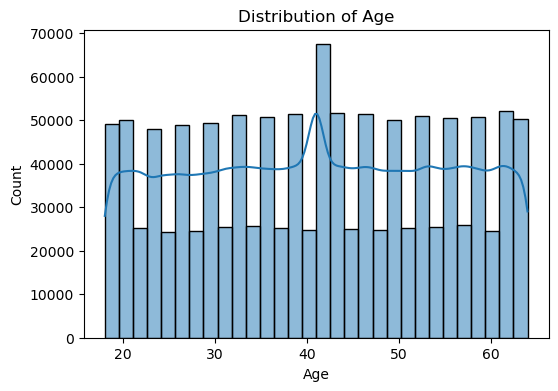

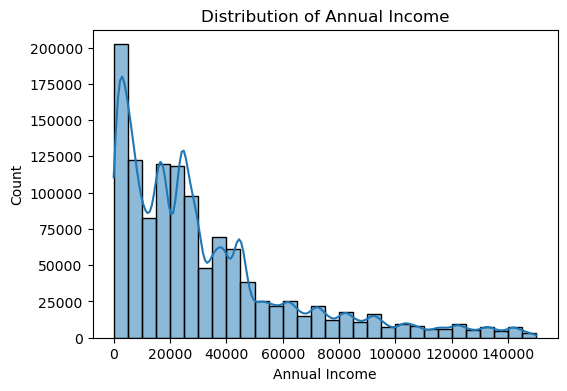

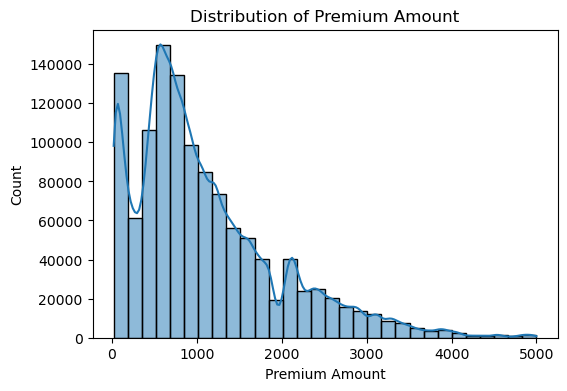

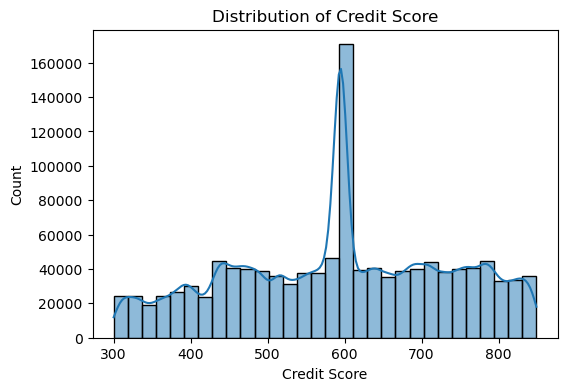

In [12]:
# distribution of feature columns
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Annual Income', 'Premium Amount', 'Credit Score']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)  # histogram + KDE
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
#Encoding of Categorical data using one-hot/Ordinal/Binary
'''
(i) Ordinal columns - Education level, and exercise frequency
(ii) Nominal - marital status, Location, Property type, Gender
(iii) Binary - Smoking Status
'''

In [13]:
#ordinal encoding
education_map={"High School":1, "Bachelor's":2, "Master's":3, "PhD":4}
exercise_map={"Rarely":1, "Monthly":2, "Weekly":3, "Daily":4}

df["Education Level Encoded"]=df["Education Level"].map(education_map)
df["Exercise Frequency Encoded"]=df["Exercise Frequency"].map(exercise_map)

In [14]:
#binary encoding
df["Smoking Status Encoded"]=df["Smoking Status"].map({"No":0,"Yes":1})

In [15]:
df.drop(columns=["Education Level", "Exercise Frequency", "Smoking Status"], inplace = True) 
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Health Score', 'Location', 'Policy Type',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Property Type', 'Premium Amount', 'Education Level Encoded',
       'Exercise Frequency Encoded', 'Smoking Status Encoded'],
      dtype='object')

In [16]:
#nominal/one-hot encoding
nominal_cols = ["Gender", "Marital Status", "Policy Type", "Location", "Property Type"]

df=pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [17]:
# splitting the data set as train and test (80-20)
from sklearn.model_selection import train_test_split

y_log = np.log1p(df["Premium Amount"])

#define feature (x) and target (y)
X=df.drop("Premium Amount", axis=1)  # all columns except target
y=y_log   #target column

#Split data set
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size= 0.2,                 #test is 20%, and train is 80%
    random_state=42               #ensure reproducibility     
)


In [18]:
#to check shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (960000, 20)
X_test: (240000, 20)
y_train: (960000,)
y_test: (240000,)


In [19]:
#scaling using minmax scaler
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ["Age", "Annual Income", "Health Score", "Previous Claims", "Vehicle Age",
                  "Credit Score", "Insurance Duration", "Number of Dependents"]

scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [20]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (960000, 20)
X_test shape: (240000, 20)
y_train shape: (960000,)
y_test shape: (240000,)


In [ ]:
#insurance duration, Health score, Previous claims, credit score, Exercise frequency

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, np.full_like(y_test, y_train.mean()))

-3.457856156963146e-08

In [33]:
!pip install mlflow
!pip uninstall protobuf -y
!pip install protobuf==3.20.3

Found existing installation: protobuf 6.33.5
Uninstalling protobuf-6.33.5:
  Successfully uninstalled protobuf-6.33.5
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
databricks-sdk 0.82.0 requires protobuf!=5.26.*,!=5.27.*,!=5.28.*,!=5.29.0,!=5.29.1,!=5.29.2,!=5.29.3,!=5.29.4,!=6.30.0,!=6.30.1,!=6.31.0,<7.0,>=4.25.8, but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.39.1 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.


In [2]:
#Model evaluation function MAE, MSE, R2 and ML flow integartion
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment("Smart_Premium_Amount")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_and_log(model, model_name):
    with mlflow.start_run(run_name=model_name):
        
        model.fit(X_train, y_train)  # train
        pred_log=model.predict(X_test)  #predict (log scale)
        preds_og=np.expm1(pred_log)   #convert back to original scale
        y_test_og=np.expm1(y_test)

        #metrics
        mae = mean_absolute_error(y_test_og, preds_og)
        rmse = np.sqrt(mean_squared_error(y_test_og, preds_og))
        r2 = r2_score(y_test, pred_log)

        #log parameter
        mlflow.log_param("model_type", model_name)
        mlflow.log_params(model.get_params())

        #log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2Score", r2)

        #log the model
        mlflow.sklearn.log_model(model, name="model")

        return{"MAE":mae, "RMSE":rmse, "R2Score":r2}

In [22]:
#model training & evaluation
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr_results = evaluate_and_log(lr,"Linear_Regression")
print(lr_results)

/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run Linear_Regression at: http://127.0.0.1:5001/#/experiments/2/runs/3986b2dc072941e8959bc02d8b167ac2
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2
{'MAE': 648.4098139222912, 'RMSE': 940.2648763864191, 'R2Score': 0.012245789169746168}


In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth =8,
    min_samples_split = 20,
    random_state=42
)

dt_results = evaluate_and_log(dt, "Decision_tree")
print(dt_results)

/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run Decision_tree at: http://127.0.0.1:5001/#/experiments/2/runs/aba7ad7e11b845adbccefd8f9be76911
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2
{'MAE': 624.472226926792, 'RMSE': 927.2055985367177, 'R2Score': 0.0684506956992218}


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(

    n_estimators =200,
    max_depth =6,
    min_samples_split =10,
    random_state = 42,
    n_jobs = -1
)

rf_results = evaluate_and_log(rf, "Random_tree")
print(rf_results)

/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run Random_tree at: http://127.0.0.1:5001/#/experiments/2/runs/fa3ad1c9e1bd408ba702acf11628176f
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2
{'MAE': 625.2201933913844, 'RMSE': 927.0720599783556, 'R2Score': 0.06673152104505142}


In [25]:
!pip install xgboost

In [26]:
from xgboost import XGBRegressor

xgb= XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_results = evaluate_and_log(xgb, "XGBoost")
print(xgb_results)

/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run XGBoost at: http://127.0.0.1:5001/#/experiments/2/runs/fbd05adde2ee45f486c173db016faeb9
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2
{'MAE': 624.5051537096024, 'RMSE': 928.727992549085, 'R2Score': 0.07026851846931681}


In [ ]:
#cehcking the MLflow the Xgboost shows best model 
#Train the model and get the best param 

In [27]:
#xgboost base model
xgb_base = XGBRegressor(
    objective = "reg:squarederror",
    random_state =42,
    n_jobs=-1
)

In [28]:
#providing the parameteres for hypertune
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.15],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

In [29]:
#Tuning engine using randomized searchCV
from sklearn.model_selection import RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions = param_grid,
    n_iter = 20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose = 1,
    random_state =42,
    n_jobs =-1
)

In [31]:
#mlflow integrated ML piepline
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment("SmartPremium_HP")

best_rmse = np.inf
best_run_id = None
best_model = None

with mlflow.start_run(run_name = "XGBoost_HyperTuned_parent"):

    xgb_search.fit(X_train, y_train)   # train with tuning

    for i, params in enumerate(xgb_search.cv_results_["params"]):

        with mlflow.start_run(run_name=f"trial_{i}", nested=True):

            model = XGBRegressor(
                objective="reg:squarederror",
                random_state=42,
                n_jobs=-1,
                **params
            )

            model.fit(X_train, y_train)

            pred_log=model.predict(X_test)  #predict (log scale)
            preds_og=np.expm1(pred_log)   #convert back to original scale
            y_test_og=np.expm1(y_test)

        #metrics
            mae = mean_absolute_error(y_test_og, preds_og)
            rmse = np.sqrt(mean_squared_error(y_test_og, preds_og))
            r2 = r2_score(y_test, pred_log)

        #log best_parameter
            mlflow.log_params(params)

        #log metrics
            mlflow.log_metric("MAE", mae)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("R2Score", r2)

        #log the model
            mlflow.sklearn.log_model(model,"model")

            # Track best model
            if rmse < best_rmse:
                best_rmse = rmse
                best_run_id = mlflow.active_run().info.run_id
                best_model = model

Fitting 3 folds for each of 20 candidates, totalling 60 fits


2026/02/01 23:57:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_0 at: http://127.0.0.1:5001/#/experiments/4/runs/c6947eaf432443feb18d791af6133df0
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:57:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_1 at: http://127.0.0.1:5001/#/experiments/4/runs/e81065e473b840c7a44d34031d8485a9
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:58:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_2 at: http://127.0.0.1:5001/#/experiments/4/runs/8c225d25033745a48bdc32f76beb6272
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:58:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_3 at: http://127.0.0.1:5001/#/experiments/4/runs/91cc55d83ef14de6a5cf0576bcdc0701
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:58:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_4 at: http://127.0.0.1:5001/#/experiments/4/runs/8c3b06d99aa640c58f3c11b6a0a1da4a
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:58:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_5 at: http://127.0.0.1:5001/#/experiments/4/runs/978113ffb17e489e9f5431007d2c2fca
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:58:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_6 at: http://127.0.0.1:5001/#/experiments/4/runs/06a80c3283c943fb9ab2aa8228916a00
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_7 at: http://127.0.0.1:5001/#/experiments/4/runs/61f59fa2e738452d8d2539005f3d606a
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_8 at: http://127.0.0.1:5001/#/experiments/4/runs/d3017d85474a49709d8d3c41bcbd1493
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_9 at: http://127.0.0.1:5001/#/experiments/4/runs/52249d449daa480b8a602853722f004a
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_10 at: http://127.0.0.1:5001/#/experiments/4/runs/c1a62ce067c449489eac29dfb1b2ea53
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_11 at: http://127.0.0.1:5001/#/experiments/4/runs/bf864c60f95b41c18835bc7f084a77d5
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_12 at: http://127.0.0.1:5001/#/experiments/4/runs/218ecf7129ad467bbb01667463be5cc7
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_13 at: http://127.0.0.1:5001/#/experiments/4/runs/3c9ae0dee9e94c18ad18781823c71647
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/01 23:59:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_14 at: http://127.0.0.1:5001/#/experiments/4/runs/a3fbeb4f96a74bce918b593e30e471de
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/02 00:00:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_15 at: http://127.0.0.1:5001/#/experiments/4/runs/4a54ee1b46a5458fb58890e210563301
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/02 00:00:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_16 at: http://127.0.0.1:5001/#/experiments/4/runs/b31620176cd74effa47a480c339ff7e5
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/02 00:00:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_17 at: http://127.0.0.1:5001/#/experiments/4/runs/e0490344ab6a454791dabaa769aeb411
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/02 00:00:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_18 at: http://127.0.0.1:5001/#/experiments/4/runs/889f1d8fbb5c4dc2af44762ac3b38a21
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


2026/02/02 00:00:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run trial_19 at: http://127.0.0.1:5001/#/experiments/4/runs/a30bbe369ba04ead881bf445a8287127
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4
🏃 View run XGBoost_HyperTuned_parent at: http://127.0.0.1:5001/#/experiments/4/runs/d9ae287e5b2741608547e6c1cad5f5f2
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/4


In [32]:
model_name = "SmartPremium_XGBoost"

mlflow.register_model(
    model_uri=f"runs:/{best_run_id}/model",
    name=model_name
)

Successfully registered model 'SmartPremium_XGBoost'.
2026/02/02 00:21:31 WARNING mlflow.tracking._model_registry.fluent: Run with id bf864c60f95b41c18835bc7f084a77d5 has no artifacts at artifact path 'model', registering model based on models:/m-036da51aba4e4783bc4ca7fb49e246bd instead
2026/02/02 00:21:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SmartPremium_XGBoost, version 1
Created version '1' of model 'SmartPremium_XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1769971891277, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1769971891277, metrics=None, model_id=None, name='SmartPremium_XGBoost', params=None, run_id='bf864c60f95b41c18835bc7f084a77d5', run_link='', source='models:/m-036da51aba4e4783bc4ca7fb49e246bd', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [34]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.search_model_versions("name='SmartPremium_XGBoost'")

[<ModelVersion: aliases=[], creation_timestamp=1769971891277, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1769971891277, metrics=None, model_id=None, name='SmartPremium_XGBoost', params=None, run_id='bf864c60f95b41c18835bc7f084a77d5', run_link='', source='models:/m-036da51aba4e4783bc4ca7fb49e246bd', status='READY', status_message=None, tags={}, user_id='', version='1'>]

In [35]:
client.transition_model_version_stage(
    name="SmartPremium_XGBoost",
    version=1,
    stage="Staging"
)

/var/folders/tf/6dqfstfx30dfv7cxnvmzj8q40000gp/T/ipykernel_69227/3848006425.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1769971891277, current_stage='Staging', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1769972332708, metrics=None, model_id=None, name='SmartPremium_XGBoost', params=None, run_id='bf864c60f95b41c18835bc7f084a77d5', run_link='', source='models:/m-036da51aba4e4783bc4ca7fb49e246bd', status='READY', status_message=None, tags={}, user_id='', version='1'>